# Data Analysis - Data Exploration

In [119]:
import pandas as pd
import sklearn
import missingno as msno
import numpy as np
from sklearn.impute import KNNImputer
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

from sklearn.decomposition import PCA
from missingpy import MissForest
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

In [120]:
NUTS2_GDP_EDU = pd.read_pickle("NUTS2.pkl")
pd.set_option('display.max_rows', 100)
NUTS2_GDP_EDU

,GEO,FREQ,EDU_2019_ED8,EDU_2018_ED8,EDU_2017_ED8,EDU_2016_ED8,EDU_2015_ED8,EDU_2014_ED8,EDU_2013_ED8,EDU_2019_ED7,...,GDP_2019,GDP_2018,GDP_2017,GDP_2016,GDP_2015,GDP_2014,GDP_2013,GDP_2012,GDP_2011,GDP_2010
0,AT1,A,10625.0,11350.0,NaN,13412.0,13733.0,13920.0,14395.0,76419.0,...,44200.0,43100.0,41700.0,41000.0,39800.0,39100.0,38500.0,38300.0,37800.0,36600.0
1,AT11,A,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2593.0,...,31600.0,30700.0,30000.0,28600.0,27800.0,26900.0,26300.0,25700.0,24600.0,23600.0
2,AT12,A,24.0,17.0,NaN,4.0,2.0,3.0,3.0,12568.0,...,36700.0,35900.0,34800.0,33500.0,32800.0,31900.0,31100.0,30800.0,30100.0,28800.0
3,AT13,A,10601.0,11333.0,NaN,13408.0,13731.0,13917.0,14392.0,61258.0,...,52700.0,51300.0,49600.0,49600.0,48100.0,47600.0,47400.0,47500.0,47300.0,46100.0
4,AT2,A,3792.0,4060.0,NaN,4410.0,4520.0,4625.0,4930.0,22063.0,...,40100.0,38700.0,37400.0,36000.0,35000.0,34400.0,33500.0,33300.0,32300.0,30700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,TRB1,A,2200.0,NaN,NaN,1778.0,1563.0,1175.0,1776.0,12232.0,...,4900.0,4800.0,5700.0,6000.0,5900.0,5400.0,5700.0,5400.0,4900.0,4800.0
334,TRB2,A,587.0,NaN,NaN,297.0,354.0,139.0,462.0,7296.0,...,3400.0,3200.0,3800.0,3900.0,3800.0,3600.0,3700.0,4000.0,3200.0,3200.0
335,TRC1,A,982.0,NaN,NaN,1060.0,942.0,433.0,639.0,10701.0,...,5300.0,5300.0,6000.0,6300.0,6400.0,5700.0,5900.0,5400.0,4600.0,4500.0
336,TRC2,A,870.0,NaN,NaN,835.0,643.0,103.0,1049.0,8273.0,...,3200.0,3100.0,3900.0,4100.0,4200.0,3800.0,4200.0,3900.0,3600.0,3600.0


#### Changing EDU data type to float  

In [121]:
#ED8 is the raw number of Doctoral students 
NUTS2_GDP_EDU["EDU_2019_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2019_ED8"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2018_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2018_ED8"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2017_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2017_ED8"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2016_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2016_ED8"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2015_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2015_ED8"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2014_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2014_ED8"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2013_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2013_ED8"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2012_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2012_ED8"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2011_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2011_ED8"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2010_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2010_ED8"], downcast="float",errors='coerce')
#ED7 is the raw number of Master students 
NUTS2_GDP_EDU["EDU_2019_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2019_ED7"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2018_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2018_ED7"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2017_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2017_ED7"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2016_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2016_ED7"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2015_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2015_ED7"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2014_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2014_ED7"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2013_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2013_ED7"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2012_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2012_ED7"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2011_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2011_ED7"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2010_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2010_ED7"], downcast="float",errors='coerce')
#ED6 is the raw number of Bachelor students 
NUTS2_GDP_EDU["EDU_2019_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2019_ED6"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2018_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2018_ED6"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2017_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2017_ED6"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2016_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2016_ED6"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2015_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2015_ED6"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2014_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2014_ED6"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["EDU_2013_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2013_ED6"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2012_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2012_ED6"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2011_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2011_ED6"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2010_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2010_ED6"], downcast="float",errors='coerce')

<AxesSubplot:>

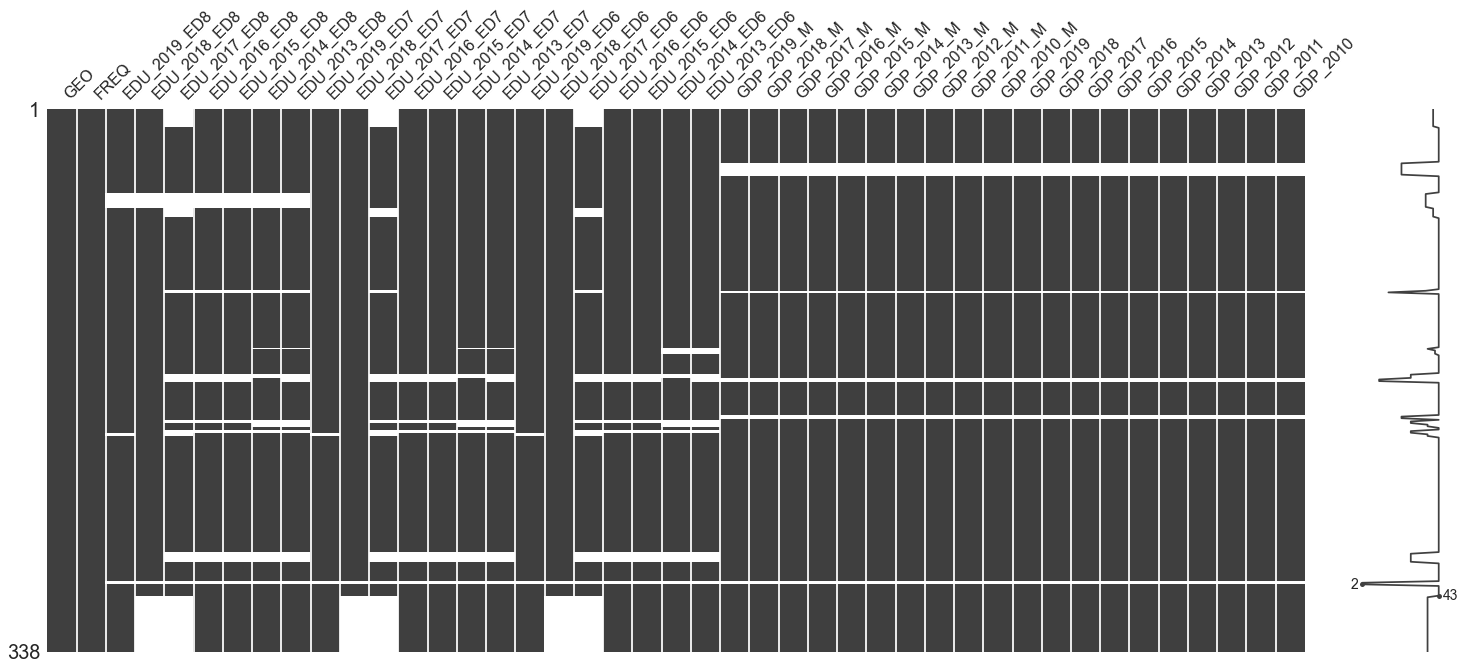

In [122]:
msno.matrix(NUTS2_GDP_EDU)

<AxesSubplot:>

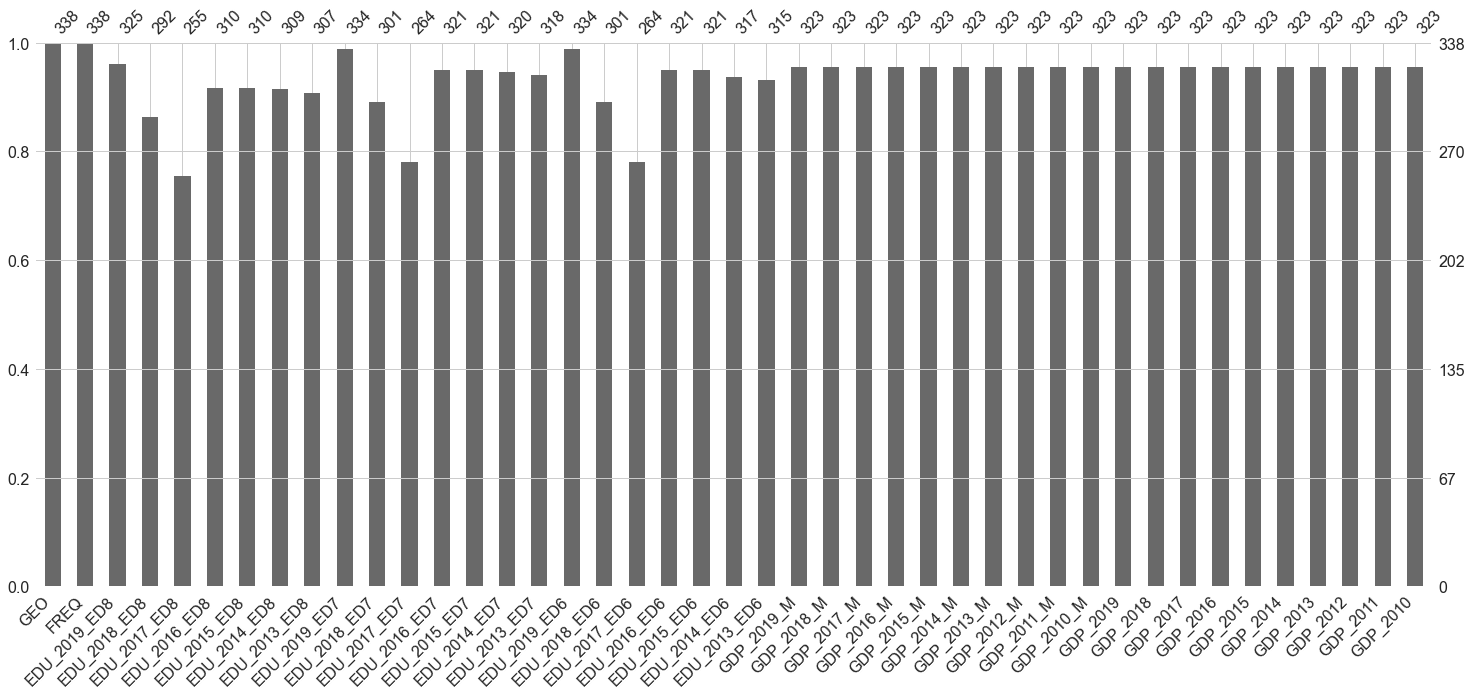

In [123]:
msno.bar(NUTS2_GDP_EDU)

#### Changing GDP data type to float  

In [124]:
#gdp_m represents GDP in millions of euros in a purticular region
NUTS2_GDP_EDU["GDP_2019_M"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2019_M"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2018_M"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2018_M"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2017_M"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2017_M"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2016_M"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2016_M"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2015_M"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2015_M"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2014_M"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2014_M"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2013_M"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2013_M"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2012_M"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2012_M"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2011_M"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2011_M"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2010_M"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2010_M"], downcast="float",errors='coerce')
#gdp euros per induvidual in a purticular NUTS region
NUTS2_GDP_EDU["GDP_2019"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2019"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2018"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2018"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2017"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2017"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2016"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2016"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2015"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2015"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2014"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2014"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2013"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2013"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2012"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2012"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2011"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2011"], downcast="float",errors='coerce')
NUTS2_GDP_EDU["GDP_2010"] = pd.to_numeric(NUTS2_GDP_EDU["GDP_2010"], downcast="float",errors='coerce')

<AxesSubplot:>

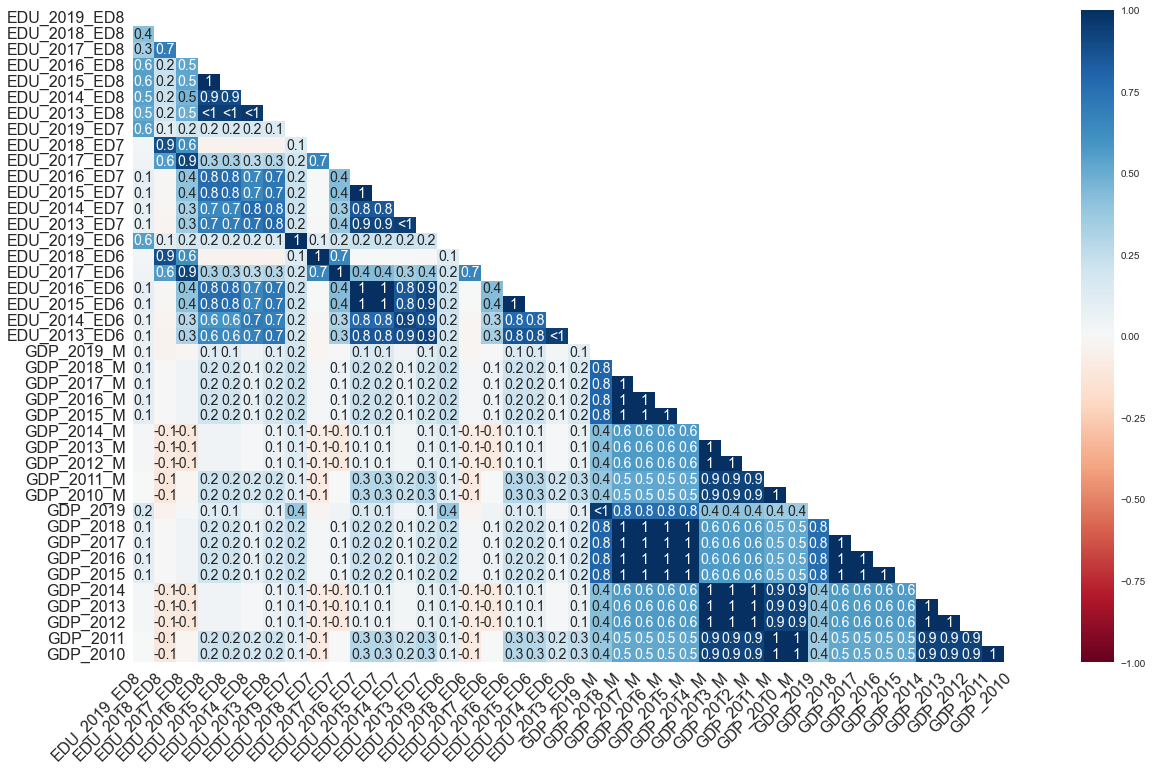

In [125]:
msno.heatmap(NUTS2_GDP_EDU)

A value near -1 means if one variable appears then the other variable is very likely to be missing.

A value near 0 means there is no dependence between the occurrence of missing values of two variables.

A value near 1 means if one variable appears then the other variable is very likely to be present

### Miss Forrest missing imputation   

Advantages:

1)Can be applied to mixed data types (missings in numeric & categorical variables)

2)No pre-processing required (no dummy-coding, standardization, data splitting, etc.)

3)No assumptions required (aside from the normal assumption of being MAR/MCAR)

4)Robust to noisy data, as random forests effectively have build-in feature selection. Methods like KNN imputation will have poor predictions in datasets with weak & non-informative predictors, whereas missForest() will make little to no use of these features

5)Non-parametric: makes no assumptions about the relationship between the features, unlike MICE which assumes linearity
Excellent predictive power

6)Can leverage non-linear and interaction effects between features to improve imputation accuracy

7)Gives an OOB error estimate for its predictions (Numeric: NRMSE/MSE, Categorical: PFC)

8)Works with high dimensionality data (p≫n)

Disadvantages:

1)Imputation time, which increases with the number of observations, predictors and number of predictors containing missing values

2)It inherits the same lack of interpretability of random forests

3)It is an algorithm, not a model object you can store somewhere. This means it has to run each time missing data has to be imputed, which could be problematic in some production environments

In [126]:
NaN_d = NUTS2_GDP_EDU.drop(['FREQ','GEO'],axis = 1)
imputer = MissForest()
X_imputed = imputer.fit_transform(NaN_d)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [127]:
Filled = pd.DataFrame(X_imputed)
Filled

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,10625.0,11350.00,11291.00,13412.0,13733.0,13920.0,14395.0,76419.0,76482.00,72643.15,...,44200.0,43100.0,41700.0,41000.0,39800.0,39100.0,38500.0,38300.0,37800.0,36600.0
1,0.0,0.00,0.06,0.0,0.0,0.0,0.0,2593.0,2097.00,1913.16,...,31600.0,30700.0,30000.0,28600.0,27800.0,26900.0,26300.0,25700.0,24600.0,23600.0
2,24.0,17.00,1.28,4.0,2.0,3.0,3.0,12568.0,12308.00,11155.53,...,36700.0,35900.0,34800.0,33500.0,32800.0,31900.0,31100.0,30800.0,30100.0,28800.0
3,10601.0,11333.00,11020.04,13408.0,13731.0,13917.0,14392.0,61258.0,62077.00,66142.24,...,52700.0,51300.0,49600.0,49600.0,48100.0,47600.0,47400.0,47500.0,47300.0,46100.0
4,3792.0,4060.00,4203.66,4410.0,4520.0,4625.0,4930.0,22063.0,23346.00,25637.16,...,40100.0,38700.0,37400.0,36000.0,35000.0,34400.0,33500.0,33300.0,32300.0,30700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2200.0,2052.93,1904.57,1778.0,1563.0,1175.0,1776.0,12232.0,11568.27,10934.17,...,4900.0,4800.0,5700.0,6000.0,5900.0,5400.0,5700.0,5400.0,4900.0,4800.0
334,587.0,510.10,400.35,297.0,354.0,139.0,462.0,7296.0,7103.39,6544.54,...,3400.0,3200.0,3800.0,3900.0,3800.0,3600.0,3700.0,4000.0,3200.0,3200.0
335,982.0,942.62,903.79,1060.0,942.0,433.0,639.0,10701.0,10804.10,10931.81,...,5300.0,5300.0,6000.0,6300.0,6400.0,5700.0,5900.0,5400.0,4600.0,4500.0
336,870.0,840.63,879.83,835.0,643.0,103.0,1049.0,8273.0,8457.27,8572.64,...,3200.0,3100.0,3900.0,4100.0,4200.0,3800.0,4200.0,3900.0,3600.0,3600.0


In [128]:
NUTS2_GDP_EDU_I = pd.DataFrame()

NUTS2_GDP_EDU_I['FREQ'] = NUTS2_GDP_EDU['FREQ']
NUTS2_GDP_EDU_I['GEO'] = NUTS2_GDP_EDU['GEO']
#ED8 is the raw number of Doctoral students 
NUTS2_GDP_EDU_I["EDU_2019_ED8"] = Filled.loc[:,0]
NUTS2_GDP_EDU_I["EDU_2018_ED8"] = Filled.loc[:,1]
NUTS2_GDP_EDU_I["EDU_2017_ED8"] = Filled.loc[:,2]
NUTS2_GDP_EDU_I["EDU_2016_ED8"] = Filled.loc[:,3]
NUTS2_GDP_EDU_I["EDU_2015_ED8"] = Filled.loc[:,4]
NUTS2_GDP_EDU_I["EDU_2014_ED8"] = Filled.loc[:,5]
NUTS2_GDP_EDU_I["EDU_2013_ED8"] = Filled.loc[:,6]
#NUTS2_GDP_EDU["EDU_2012_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2012_ED8"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2011_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2011_ED8"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2010_ED8"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2010_ED8"], downcast="float",errors='coerce')
#ED7 is the raw number of Master students 
NUTS2_GDP_EDU_I["EDU_2019_ED7"] = Filled.loc[:,7]
NUTS2_GDP_EDU_I["EDU_2018_ED7"] = Filled.loc[:,8]
NUTS2_GDP_EDU_I["EDU_2017_ED7"] = Filled.loc[:,9]
NUTS2_GDP_EDU_I["EDU_2016_ED7"] = Filled.loc[:,10]
NUTS2_GDP_EDU_I["EDU_2015_ED7"] = Filled.loc[:,11]
NUTS2_GDP_EDU_I["EDU_2014_ED7"] = Filled.loc[:,12]
NUTS2_GDP_EDU_I["EDU_2013_ED7"] = Filled.loc[:,13]
#NUTS2_GDP_EDU["EDU_2012_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2012_ED7"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2011_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2011_ED7"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2010_ED7"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2010_ED7"], downcast="float",errors='coerce')
#ED6 is the raw number of Bachelor students 
NUTS2_GDP_EDU_I["EDU_2019_ED6"] = Filled.loc[:,14]
NUTS2_GDP_EDU_I["EDU_2018_ED6"] = Filled.loc[:,15]
NUTS2_GDP_EDU_I["EDU_2017_ED6"] = Filled.loc[:,16]
NUTS2_GDP_EDU_I["EDU_2016_ED6"] = Filled.loc[:,17]
NUTS2_GDP_EDU_I["EDU_2015_ED6"] = Filled.loc[:,18]
NUTS2_GDP_EDU_I["EDU_2014_ED6"] = Filled.loc[:,19]
NUTS2_GDP_EDU_I["EDU_2013_ED6"] = Filled.loc[:,20]
#NUTS2_GDP_EDU["EDU_2012_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2012_ED6"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2011_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2011_ED6"], downcast="float",errors='coerce')
#NUTS2_GDP_EDU["EDU_2010_ED6"] = pd.to_numeric(NUTS2_GDP_EDU["EDU_2010_ED6"], downcast="float",errors='coerce')

In [129]:
#gdp_m represents GDP in millions of euros in a purticular region
NUTS2_GDP_EDU_I["GDP_2019_M"] = Filled.loc[:,21]
NUTS2_GDP_EDU_I["GDP_2018_M"] = Filled.loc[:,22]
NUTS2_GDP_EDU_I["GDP_2017_M"] = Filled.loc[:,23]
NUTS2_GDP_EDU_I["GDP_2016_M"] = Filled.loc[:,24]
NUTS2_GDP_EDU_I["GDP_2015_M"] = Filled.loc[:,25]
NUTS2_GDP_EDU_I["GDP_2014_M"] = Filled.loc[:,26]
NUTS2_GDP_EDU_I["GDP_2013_M"] = Filled.loc[:,27]
NUTS2_GDP_EDU_I["GDP_2012_M"] = Filled.loc[:,28]
NUTS2_GDP_EDU_I["GDP_2011_M"] = Filled.loc[:,29]
NUTS2_GDP_EDU_I["GDP_2010_M"] = Filled.loc[:,30]
#gdp euros per induvidual in a purticular NUTS region
NUTS2_GDP_EDU_I["GDP_2019"] = Filled.loc[:,31]
NUTS2_GDP_EDU_I["GDP_2018"] = Filled.loc[:,32]
NUTS2_GDP_EDU_I["GDP_2017"] = Filled.loc[:,33]
NUTS2_GDP_EDU_I["GDP_2016"] = Filled.loc[:,34]
NUTS2_GDP_EDU_I["GDP_2015"] = Filled.loc[:,35]
NUTS2_GDP_EDU_I["GDP_2014"] = Filled.loc[:,36]
NUTS2_GDP_EDU_I["GDP_2013"] = Filled.loc[:,37]
NUTS2_GDP_EDU_I["GDP_2012"] = Filled.loc[:,38]
NUTS2_GDP_EDU_I["GDP_2011"] = Filled.loc[:,39]
NUTS2_GDP_EDU_I["GDP_2010"] = Filled.loc[:,40]

<AxesSubplot:>

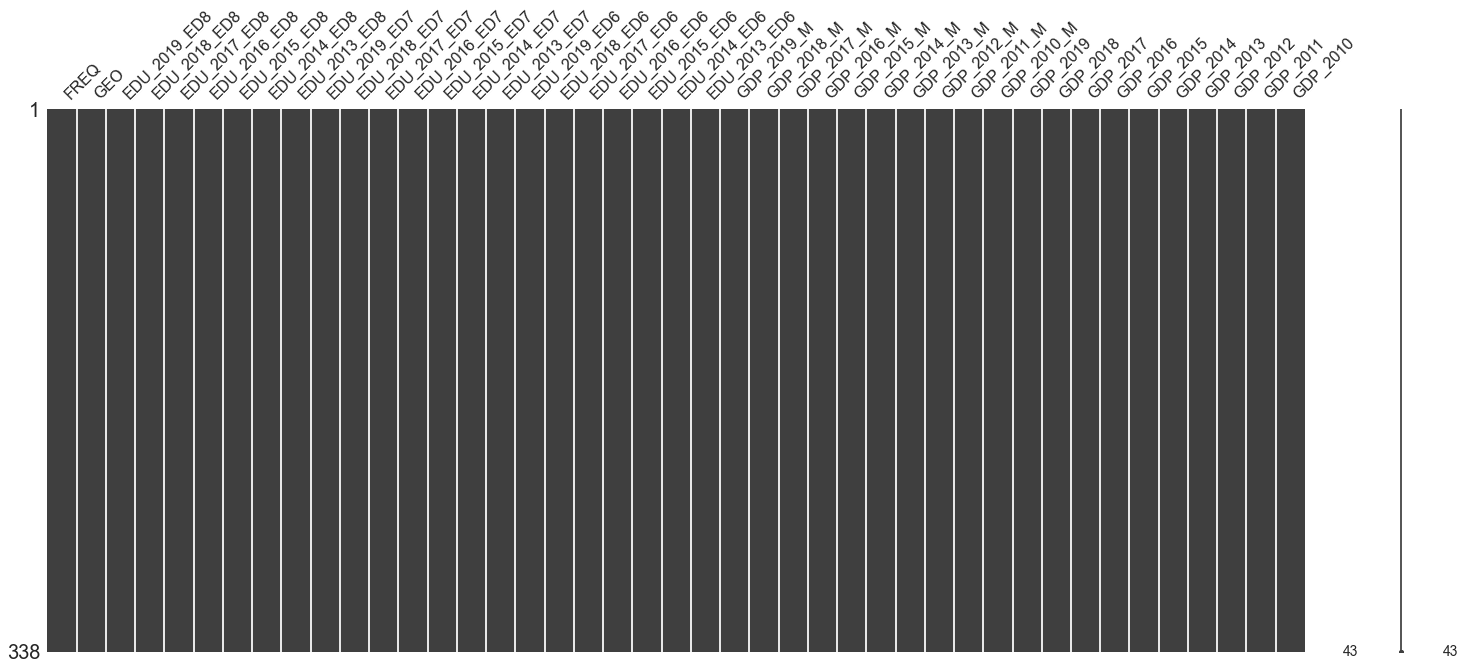

In [130]:
msno.matrix(NUTS2_GDP_EDU_I)

### K Means Clustering  

1) Standarization of the variables is not required 

2) Every run is bound to give slightly different result as the starting point of the K-Means is random 

3) The siloehts of the K-means clusters will be analyzed to give further insignt 

##### Elbow Method  

In [131]:
K_mean = pd.DataFrame(NUTS2_GDP_EDU_I)
K_mean =  K_mean.drop(columns=['FREQ'])
K_means_D = K_mean.drop(columns=['GEO'])
K_means_D.head()

,EDU_2019_ED8,EDU_2018_ED8,EDU_2017_ED8,EDU_2016_ED8,EDU_2015_ED8,EDU_2014_ED8,EDU_2013_ED8,EDU_2019_ED7,EDU_2018_ED7,EDU_2017_ED7,...,GDP_2019,GDP_2018,GDP_2017,GDP_2016,GDP_2015,GDP_2014,GDP_2013,GDP_2012,GDP_2011,GDP_2010
0,10625.0,11350.0,11291.00,13412.0,13733.0,13920.0,14395.0,76419.0,76482.0,72643.15,...,44200.0,43100.0,41700.0,41000.0,39800.0,39100.0,38500.0,38300.0,37800.0,36600.0
1,0.0,0.0,0.06,0.0,0.0,0.0,0.0,2593.0,2097.0,1913.16,...,31600.0,30700.0,30000.0,28600.0,27800.0,26900.0,26300.0,25700.0,24600.0,23600.0
2,24.0,17.0,1.28,4.0,2.0,3.0,3.0,12568.0,12308.0,11155.53,...,36700.0,35900.0,34800.0,33500.0,32800.0,31900.0,31100.0,30800.0,30100.0,28800.0
3,10601.0,11333.0,11020.04,13408.0,13731.0,13917.0,14392.0,61258.0,62077.0,66142.24,...,52700.0,51300.0,49600.0,49600.0,48100.0,47600.0,47400.0,47500.0,47300.0,46100.0
4,3792.0,4060.0,4203.66,4410.0,4520.0,4625.0,4930.0,22063.0,23346.0,25637.16,...,40100.0,38700.0,37400.0,36000.0,35000.0,34400.0,33500.0,33300.0,32300.0,30700.0


In [132]:
K_mean

,GEO,EDU_2019_ED8,EDU_2018_ED8,EDU_2017_ED8,EDU_2016_ED8,EDU_2015_ED8,EDU_2014_ED8,EDU_2013_ED8,EDU_2019_ED7,EDU_2018_ED7,...,GDP_2019,GDP_2018,GDP_2017,GDP_2016,GDP_2015,GDP_2014,GDP_2013,GDP_2012,GDP_2011,GDP_2010
0,AT1,10625.0,11350.00,11291.00,13412.0,13733.0,13920.0,14395.0,76419.0,76482.00,...,44200.0,43100.0,41700.0,41000.0,39800.0,39100.0,38500.0,38300.0,37800.0,36600.0
1,AT11,0.0,0.00,0.06,0.0,0.0,0.0,0.0,2593.0,2097.00,...,31600.0,30700.0,30000.0,28600.0,27800.0,26900.0,26300.0,25700.0,24600.0,23600.0
2,AT12,24.0,17.00,1.28,4.0,2.0,3.0,3.0,12568.0,12308.00,...,36700.0,35900.0,34800.0,33500.0,32800.0,31900.0,31100.0,30800.0,30100.0,28800.0
3,AT13,10601.0,11333.00,11020.04,13408.0,13731.0,13917.0,14392.0,61258.0,62077.00,...,52700.0,51300.0,49600.0,49600.0,48100.0,47600.0,47400.0,47500.0,47300.0,46100.0
4,AT2,3792.0,4060.00,4203.66,4410.0,4520.0,4625.0,4930.0,22063.0,23346.00,...,40100.0,38700.0,37400.0,36000.0,35000.0,34400.0,33500.0,33300.0,32300.0,30700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,TRB1,2200.0,2052.93,1904.57,1778.0,1563.0,1175.0,1776.0,12232.0,11568.27,...,4900.0,4800.0,5700.0,6000.0,5900.0,5400.0,5700.0,5400.0,4900.0,4800.0
334,TRB2,587.0,510.10,400.35,297.0,354.0,139.0,462.0,7296.0,7103.39,...,3400.0,3200.0,3800.0,3900.0,3800.0,3600.0,3700.0,4000.0,3200.0,3200.0
335,TRC1,982.0,942.62,903.79,1060.0,942.0,433.0,639.0,10701.0,10804.10,...,5300.0,5300.0,6000.0,6300.0,6400.0,5700.0,5900.0,5400.0,4600.0,4500.0
336,TRC2,870.0,840.63,879.83,835.0,643.0,103.0,1049.0,8273.0,8457.27,...,3200.0,3100.0,3900.0,4100.0,4200.0,3800.0,4200.0,3900.0,3600.0,3600.0


In [133]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(K_means_D)
    wcss.append(kmeans.inertia_)
print(wcss)

[3635679815258742.5, 334712131399252.25, 70254103839206.78, 40281072756867.56, 18956052809127.953, 12172215508473.68, 8695362981961.638, 7217508624195.338, 6126261989300.232, 5299910567050.228, 4587173935450.982, 3859908932467.8193, 3351458156925.382, 3065427035294.8604]


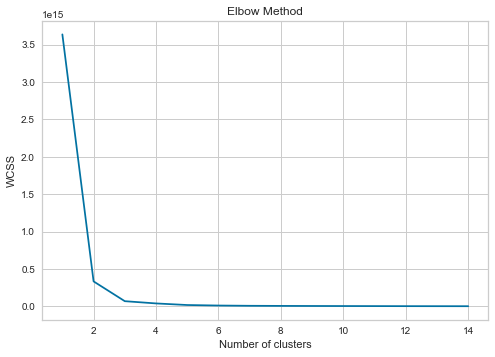

In [134]:
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [135]:
pca = PCA(3)
 #Transform the data
pca_d = pca.fit_transform(K_means_D)
pca_d.shape
pca.explained_variance_ratio_

array([0.94086156, 0.05595315, 0.00223068])

From the graph above we can safely take upto 3 clusters in out data and even 2 clusters which has a good WSS score can be taken

In [136]:
kmeans = KMeans(n_clusters= 3)
np.random.seed(1234)

k5cls = kmeans.fit(pca_d)
k5cls.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

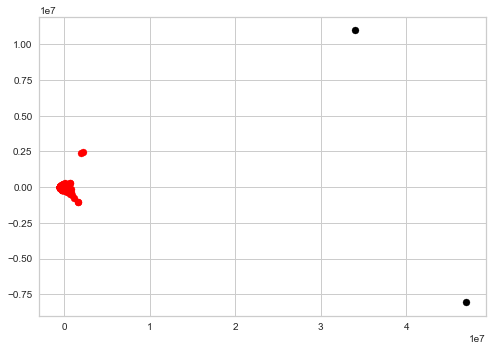

In [137]:
#filter rows of original data
filtered_label0 = pca_d[k5cls.labels_ == 0]
filtered_label1 = pca_d[k5cls.labels_ == 1]
filtered_label2 = pca_d[k5cls.labels_ == 2]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black')
plt.show()

In [150]:
kmeans = KMeans(n_clusters= 4)
np.random.seed(1234)

k5cls = kmeans.fit(K_means_D)
k5cls.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [151]:
filtered_label0 = K_mean[k5cls.labels_ == 0]
filtered_label0

,GEO,EDU_2019_ED8,EDU_2018_ED8,EDU_2017_ED8,EDU_2016_ED8,EDU_2015_ED8,EDU_2014_ED8,EDU_2013_ED8,EDU_2019_ED7,EDU_2018_ED7,...,GDP_2019,GDP_2018,GDP_2017,GDP_2016,GDP_2015,GDP_2014,GDP_2013,GDP_2012,GDP_2011,GDP_2010
0,AT1,10625.0,11350.00,11291.00,13412.0,13733.0,13920.0,14395.0,76419.0,76482.00,...,44200.0,43100.0,41700.0,41000.0,39800.0,39100.0,38500.0,38300.0,37800.0,36600.0
1,AT11,0.0,0.00,0.06,0.0,0.0,0.0,0.0,2593.0,2097.00,...,31600.0,30700.0,30000.0,28600.0,27800.0,26900.0,26300.0,25700.0,24600.0,23600.0
2,AT12,24.0,17.00,1.28,4.0,2.0,3.0,3.0,12568.0,12308.00,...,36700.0,35900.0,34800.0,33500.0,32800.0,31900.0,31100.0,30800.0,30100.0,28800.0
3,AT13,10601.0,11333.00,11020.04,13408.0,13731.0,13917.0,14392.0,61258.0,62077.00,...,52700.0,51300.0,49600.0,49600.0,48100.0,47600.0,47400.0,47500.0,47300.0,46100.0
4,AT2,3792.0,4060.00,4203.66,4410.0,4520.0,4625.0,4930.0,22063.0,23346.00,...,40100.0,38700.0,37400.0,36000.0,35000.0,34400.0,33500.0,33300.0,32300.0,30700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,TRB1,2200.0,2052.93,1904.57,1778.0,1563.0,1175.0,1776.0,12232.0,11568.27,...,4900.0,4800.0,5700.0,6000.0,5900.0,5400.0,5700.0,5400.0,4900.0,4800.0
334,TRB2,587.0,510.10,400.35,297.0,354.0,139.0,462.0,7296.0,7103.39,...,3400.0,3200.0,3800.0,3900.0,3800.0,3600.0,3700.0,4000.0,3200.0,3200.0
335,TRC1,982.0,942.62,903.79,1060.0,942.0,433.0,639.0,10701.0,10804.10,...,5300.0,5300.0,6000.0,6300.0,6400.0,5700.0,5900.0,5400.0,4600.0,4500.0
336,TRC2,870.0,840.63,879.83,835.0,643.0,103.0,1049.0,8273.0,8457.27,...,3200.0,3100.0,3900.0,4100.0,4200.0,3800.0,4200.0,3900.0,3600.0,3600.0


In [152]:
filtered_label1 = K_mean[k5cls.labels_ == 1]
filtered_label1

,GEO,EDU_2019_ED8,EDU_2018_ED8,EDU_2017_ED8,EDU_2016_ED8,EDU_2015_ED8,EDU_2014_ED8,EDU_2013_ED8,EDU_2019_ED7,EDU_2018_ED7,...,GDP_2019,GDP_2018,GDP_2017,GDP_2016,GDP_2015,GDP_2014,GDP_2013,GDP_2012,GDP_2011,GDP_2010
114,EU28,763199.0,771550.0,21553.76,16297.47,14310.27,17027.36,21250.97,5658924.0,5597960.0,...,26416.0,25812.0,25108.0,24254.0,24232.0,23332.0,22780.0,22171.0,22010.0,21286.0


In [153]:
filtered_label2 = K_mean[k5cls.labels_ == 2]
filtered_label2

,GEO,EDU_2019_ED8,EDU_2018_ED8,EDU_2017_ED8,EDU_2016_ED8,EDU_2015_ED8,EDU_2014_ED8,EDU_2013_ED8,EDU_2019_ED7,EDU_2018_ED7,...,GDP_2019,GDP_2018,GDP_2017,GDP_2016,GDP_2015,GDP_2014,GDP_2013,GDP_2012,GDP_2011,GDP_2010
113,EU27_2020,650654.0,660293.0,21565.58,16296.48,14316.92,17039.02,21278.6,5173528.0,5147369.0,...,31200.0,30200.0,29300.0,28200.0,27500.0,26600.0,26000.0,25700.0,25600.0,24900.0


In [154]:
filtered_label3 = K_mean[k5cls.labels_ == 3]
filtered_label3

,GEO,EDU_2019_ED8,EDU_2018_ED8,EDU_2017_ED8,EDU_2016_ED8,EDU_2015_ED8,EDU_2014_ED8,EDU_2013_ED8,EDU_2019_ED7,EDU_2018_ED7,...,GDP_2019,GDP_2018,GDP_2017,GDP_2016,GDP_2015,GDP_2014,GDP_2013,GDP_2012,GDP_2011,GDP_2010
312,TR4,10065.0,10450.33,9985.65,8443.0,7429.0,5987.0,6955.0,50582.0,108994.66,...,9700.0,10000.0,11400.0,11700.0,11900.0,11000.0,11400.0,10900.0,9900.0,9600.0
313,TR41,5408.0,5096.45,4509.55,4279.0,3899.0,2908.0,3324.0,23593.0,79413.60,...,9100.0,9300.0,10600.0,11000.0,11100.0,10300.0,10800.0,10400.0,9400.0,9100.0


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

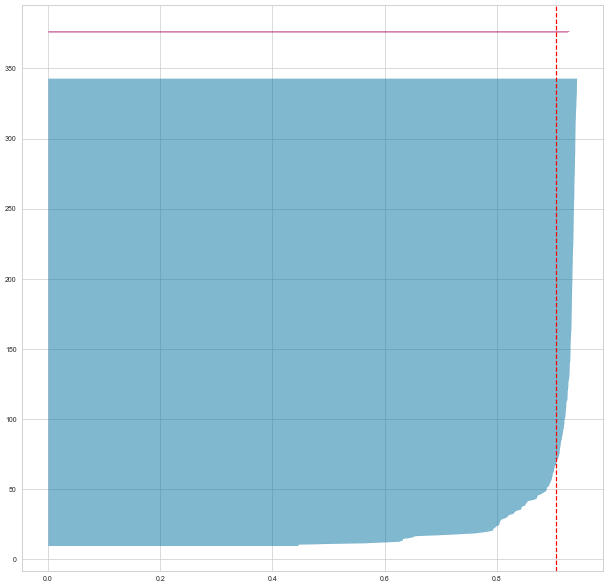

In [155]:
f, ax = plt.subplots(1, figsize=(15, 15), dpi =50)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(K_means_D)

There is no negeative dispersion which is a good sign as it showcases that none of the clusters are wrongly assigned, expect when we increase the value of the number of clusters.


# Conclusion

93% percent of the variance in the data is explained by the first principle component, this makes sense in way that our data showcases time series of only 5 attributes, 3 of them related to education and 2 of the to GDP, these data over the last 10 years have not changed drastically and most of these atrributes are sharply towards the first principle component  

The K-Means clustering showcases a similar story, where we can see that on a row wise most of the places with respect to just the attributes chosen are clustering together.

The issue is that these variables alone in a time series are not enough form distinct clustering.

Moreover if the entire data set of NUTS2 is taken from Eurostat, we will be able to notice intresting clusters 